# CAPM - Capital Asset Pricing Model 

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [11]:
# Model CAPM as a simple linear regression

In [12]:
from scipy import stats

In [13]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [14]:
import pandas as pd

In [15]:
import pandas_datareader as web

In [16]:
spy_etf = web.DataReader('SPY','yahoo')

In [17]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2009-12-31 to 2017-12-26
Data columns (total 6 columns):
Open         2011 non-null float64
High         2011 non-null float64
Low          2011 non-null float64
Close        2011 non-null float64
Adj Close    2011 non-null float64
Volume       2011 non-null int64
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [18]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,95.218681,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.833588,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,97.089912,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,97.158264,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,97.568398,131091100


In [19]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [20]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [21]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,27.146566,111902700


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

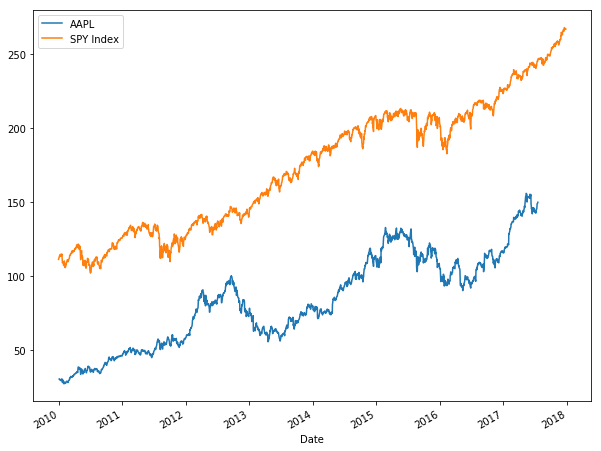

In [23]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [24]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5,1,'Cumulative Return')

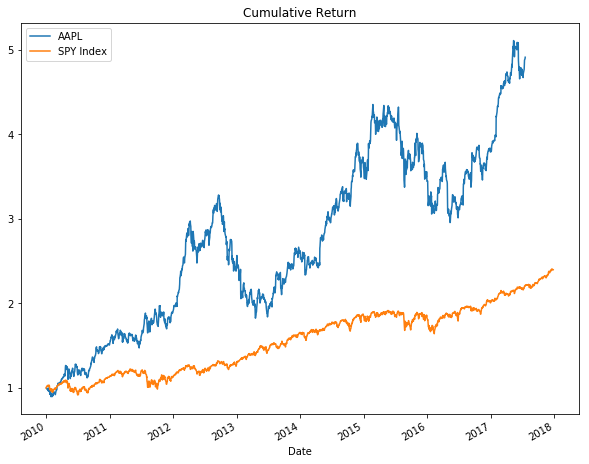

In [25]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [29]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

ValueError: x and y must be the same size

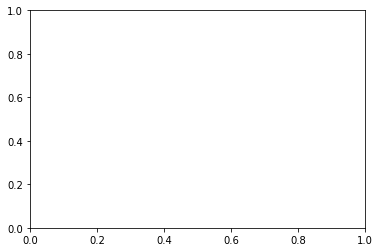

In [30]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

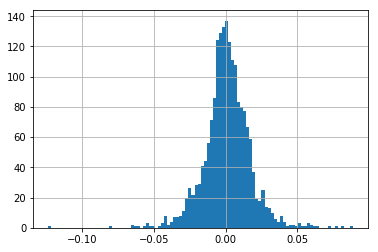

In [31]:
aapl['Daily Return'].hist(bins=100)

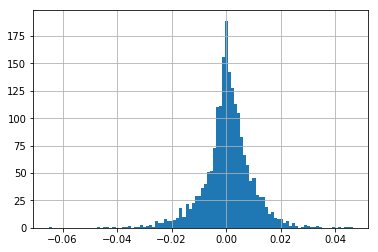

In [32]:
spy_etf['Daily Return'].hist(bins=100)

In [33]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [34]:
beta

NameError: name 'beta' is not defined

In [35]:
alpha

NameError: name 'alpha' is not defined

In [36]:
r_value

NameError: name 'r_value' is not defined

## What if our stock was completely related to SP500?

In [37]:
spy_etf['Daily Return'].head()

Date
2009-12-31         NaN
2010-01-04    0.016960
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
Name: Daily Return, dtype: float64

In [38]:
import numpy as np

In [39]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [40]:
noise

array([-0.00034044,  0.00184185,  0.00112486, ...,  0.00014168,
       -0.00084864, -0.00099799])

In [41]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-04    0.016619
2010-01-05    0.004489
2010-01-06    0.001829
2010-01-07    0.004660
2010-01-08    0.004231
2010-01-11    0.001813
2010-01-12   -0.008206
2010-01-13    0.009609
2010-01-14    0.002318
2010-01-15   -0.009663
2010-01-19    0.012643
2010-01-20   -0.009002
2010-01-21   -0.019622
2010-01-22   -0.019418
2010-01-25    0.004268
2010-01-26   -0.002606
2010-01-27    0.004613
2010-01-28   -0.010759
2010-01-29   -0.011163
2010-02-01    0.015552
2010-02-02    0.011382
2010-02-03   -0.006176
2010-02-04   -0.032583
2010-02-05    0.002068
2010-02-08   -0.007740
2010-02-09    0.013254
2010-02-10   -0.001539
2010-02-11    0.011096
2010-02-12   -0.000821
2010-02-16    0.014986
                ...   
2017-11-13    0.001427
2017-11-14   -0.001105
2017-11-15   -0.004440
2017-11-16    0.009345
2017-11-17   -0.005208
2017-11-20    0.003609
2017-11-21    0.006117
2017-11-22    0.001216
2017-11-24    0.001824
2017-11-27    0.000333
2017-11-28    0.009983
2017-11-29   -0.001721
2017-1

In [42]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [43]:
beta

0.98980837703844904

In [44]:
alpha

-2.5558369316186318e-06

Looks like our understanding is correct!